In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from datetime import datetime

In [2]:
#data=pd.read_csv("godavari_daily.csv")
data=pd.read_excel("data/Godavari.xlsx")
y=data['Flood']
# data.drop('Flood',axis=1,inplace=True)

# dataset has benn updated to make a binary classification problem. 

In [3]:
set(y)

{0.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9,
 1.0,
 1.1,
 1.2,
 1.3,
 1.4,
 1.6,
 1.7,
 1.8,
 1.9,
 2.0,
 2.1,
 2.2,
 2.4,
 2.5,
 2.6,
 2.7,
 2.8,
 2.9,
 3.0,
 3.1,
 3.2,
 3.5,
 3.6,
 3.8,
 4.0,
 4.2,
 4.8,
 5.4,
 5.5,
 6.0,
 6.1,
 6.5,
 6.9,
 7.0,
 7.1,
 7.3,
 7.4,
 7.9,
 8.4,
 9.4,
 9.8,
 10.0}

<Axes: >

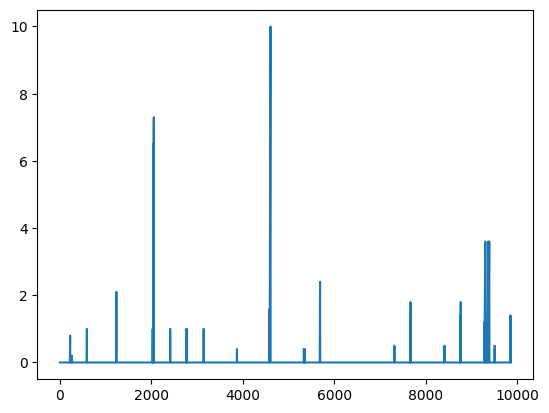

In [4]:
y.plot(x = data['Date'], y = y)

In [5]:
print(data.shape)
data.head()

(9861, 6)


,Date,Discharge,flood runoff,daily runoff,weekly runoff,Flood
0,1998-01-01,3244.0,0.0,0.91,NaN,0.0
1,1998-01-02,1591.0,0.0,0.45,NaN,0.0
2,1998-01-03,1973.0,0.0,0.55,NaN,0.0
3,1998-01-04,1973.0,0.0,0.55,NaN,0.0
4,1998-01-05,2011.0,0.0,0.56,NaN,0.0


In [6]:
for i in range(len(y)):
    if y.iloc[i] >= 0.5 :
        y.iloc[i]=1.0
    else :
        y.iloc[i]=0.0
data.drop('Flood',axis=1,inplace=True)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_1884\1243519634.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[i]=0.0
C:\Users\Harsh\AppData\Local\Temp\ipykernel_1884\1243519634.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[i]=0.0
C:\Users\Harsh\AppData\Local\Temp\ipykernel_1884\1243519634.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.iloc[i]=0.0
C:\Users\Harsh\AppData\Local\Temp\ipykernel_1884\1243519634.p

In [7]:
y.value_counts()

Flood
0.0    9710
1.0     151
Name: count, dtype: int64

In [8]:
data.head()

,Date,Discharge,flood runoff,daily runoff,weekly runoff
0,1998-01-01,3244.0,0.0,0.91,NaN
1,1998-01-02,1591.0,0.0,0.45,NaN
2,1998-01-03,1973.0,0.0,0.55,NaN
3,1998-01-04,1973.0,0.0,0.55,NaN
4,1998-01-05,2011.0,0.0,0.56,NaN


In [9]:
d1=pd.DataFrame()
d1["Day"]=data['Date']
d1['Months']=data['Date']
d1['Year']=data['Date']


In [10]:
data['Date']=pd.to_datetime(data['Date'])

In [11]:
d1["Year"]=data.Date.dt.year
d1["Months"]=data.Date.dt.month
d1["Day"]=data.Date.dt.day
d1.head()

,Day,Months,Year
0,1,1,1998
1,2,1,1998
2,3,1,1998
3,4,1,1998
4,5,1,1998


In [12]:
type(d1['Day'][0])

numpy.int32

In [13]:
data.head()

,Date,Discharge,flood runoff,daily runoff,weekly runoff
0,1998-01-01,3244.0,0.0,0.91,NaN
1,1998-01-02,1591.0,0.0,0.45,NaN
2,1998-01-03,1973.0,0.0,0.55,NaN
3,1998-01-04,1973.0,0.0,0.55,NaN
4,1998-01-05,2011.0,0.0,0.56,NaN


In [14]:
data = data.fillna(data.mean())
data.info()
data.drop(columns='Date',axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9861 entries, 0 to 9860
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9861 non-null   datetime64[ns]
 1   Discharge      9861 non-null   float64       
 2   flood runoff   9861 non-null   float64       
 3   daily runoff   9861 non-null   float64       
 4   weekly runoff  9861 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 385.3 KB


In [15]:
data.head()

,Discharge,flood runoff,daily runoff,weekly runoff
0,3244.0,0.0,0.91,7.487605
1,1591.0,0.0,0.45,7.487605
2,1973.0,0.0,0.55,7.487605
3,1973.0,0.0,0.55,7.487605
4,2011.0,0.0,0.56,7.487605


In [16]:
data=pd.concat([d1,data],axis=1)
data.head()

,Day,Months,Year,Discharge,flood runoff,daily runoff,weekly runoff
0,1,1,1998,3244.0,0.0,0.91,7.487605
1,2,1,1998,1591.0,0.0,0.45,7.487605
2,3,1,1998,1973.0,0.0,0.55,7.487605
3,4,1,1998,1973.0,0.0,0.55,7.487605
4,5,1,1998,2011.0,0.0,0.56,7.487605


In [17]:
scl=MinMaxScaler()
data1=scl.fit_transform(data.iloc[:,3:])
data1=scl.fit_transform(data1)

In [18]:
column=['Discharge','flood runoff','daily runoff','weekly runoff']

In [19]:
data1=pd.DataFrame(data1,columns=column)
data1.head()

,Discharge,flood runoff,daily runoff,weekly runoff
0,0.107581,0.0,0.107820,0.155992
1,0.052762,0.0,0.053318,0.155992
2,0.065431,0.0,0.065166,0.155992
3,0.065431,0.0,0.065166,0.155992
4,0.066691,0.0,0.066351,0.155992


In [20]:
data1.head()

,Discharge,flood runoff,daily runoff,weekly runoff
0,0.107581,0.0,0.107820,0.155992
1,0.052762,0.0,0.053318,0.155992
2,0.065431,0.0,0.065166,0.155992
3,0.065431,0.0,0.065166,0.155992
4,0.066691,0.0,0.066351,0.155992


In [21]:
data1.describe()

,Discharge,flood runoff,daily runoff,weekly runoff
count,9861.000000,9861.000000,9861.000000,9861.000000
mean,0.126769,0.002407,0.126871,0.155992
std,0.114359,0.034929,0.114461,0.133894
min,0.000000,0.000000,0.000000,0.000000
25%,0.051237,0.000000,0.050948,0.067292
50%,0.088280,0.000000,0.087678,0.107917
75%,0.161637,0.000000,0.162322,0.199792
max,1.000000,1.000000,1.000000,1.000000


In [22]:
data.describe()

,Day,Months,Year,Discharge,flood runoff,daily runoff,weekly runoff
count,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000
mean,15.728425,6.522259,2010.999392,3822.602887,0.084251,1.070791,7.487605
std,8.799783,3.448643,7.788768,3448.374602,1.222502,0.966051,6.426904
min,1.000000,1.000000,1998.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,4.000000,2004.000000,1545.000000,0.000000,0.430000,3.230000
50%,16.000000,7.000000,2011.000000,2662.000000,0.000000,0.740000,5.180000
75%,23.000000,10.000000,2018.000000,4874.000000,0.000000,1.370000,9.590000
max,31.000000,12.000000,2024.000000,30154.000000,35.000000,8.440000,48.000000


In [23]:
x=pd.DataFrame(data=data['Day'])
x['Months']=data['Months']
x['Year']=data['Year']
x.head()

,Day,Months,Year
0,1,1,1998
1,2,1,1998
2,3,1,1998
3,4,1,1998
4,5,1,1998


In [24]:
data1=pd.concat([x,data1],axis=1)

In [25]:
data=data1
data.head()

,Day,Months,Year,Discharge,flood runoff,daily runoff,weekly runoff
0,1,1,1998,0.107581,0.0,0.107820,0.155992
1,2,1,1998,0.052762,0.0,0.053318,0.155992
2,3,1,1998,0.065431,0.0,0.065166,0.155992
3,4,1,1998,0.065431,0.0,0.065166,0.155992
4,5,1,1998,0.066691,0.0,0.066351,0.155992


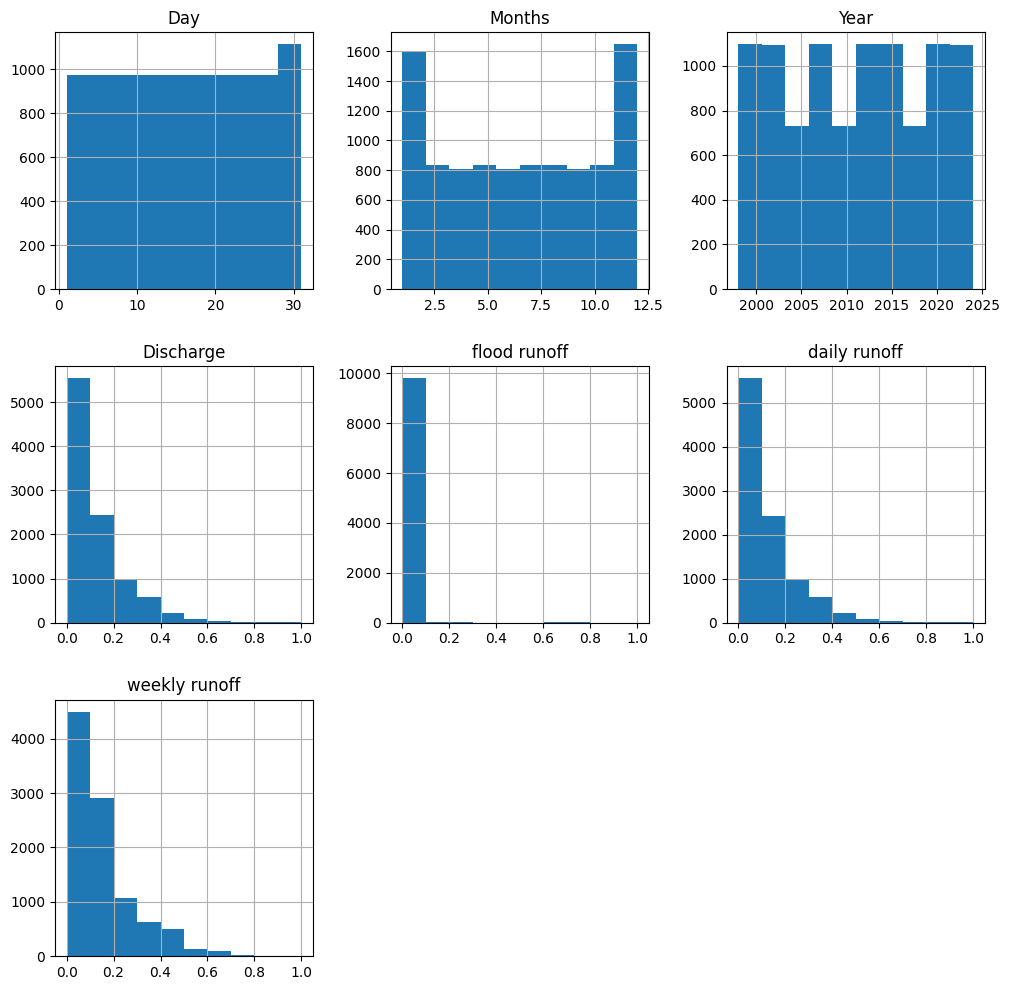

In [26]:
data.hist(figsize=(12,12));

In [27]:
print(data.columns)

Index(['Day', 'Months', 'Year', 'Discharge', 'flood runoff', 'daily runoff',
       'weekly runoff'],
      dtype='object')


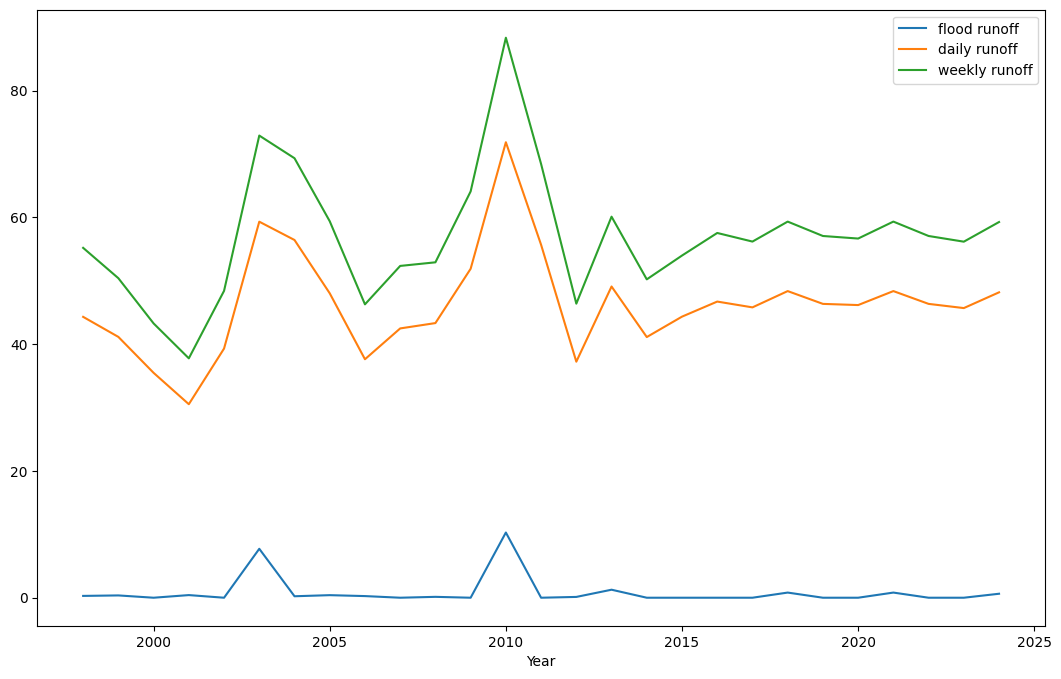

In [28]:
data[['Year', 'flood runoff', 'daily runoff', 'weekly runoff']].groupby("Year").sum().plot(figsize=(13,8));

In [29]:
locate=0;
for i in range(len(data["Day"])):
    if(data["Day"][i]==31 and data["Months"][i]==12 and data["Year"][i]==2012):
        locate=i;
        break;

i=locate+1
print(i)

x_train=data.iloc[0:i,:]
y_train=y.iloc[0:i]
x_test=data.iloc[i:,:]
y_test=y.iloc[i:]


5479


In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5479, 7)
(5479,)
(4382, 7)
(4382,)


In [31]:
y_test.value_counts()

Flood
0.0    4287
1.0      95
Name: count, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(x_train,y_train)
yp=reg.predict(x_test)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))


0.6256019017549346
0.07050159435763315


In [34]:
# from sklearn import linear_model
# from sklearn.metrics import mean_absolute_error
# # linear model
# reg = linear_model.ElasticNet(alpha=0.5)
# reg.fit(X_train_res_shuf, Y_train_res_shuf)
# y_pred = reg.predict(x_test)
# print(mean_absolute_error(y_test, y_pred))

In [35]:
yt=np.array(y_test)
len((y_test))

4382

In [36]:
# Y_pre["ypre"].value_counts()

In [37]:
# Y_pre=pd.DataFrame()
# Y_pre["ypre"]=y_pred
# Y_pre["ytest"]=yt
# #Y_pre

In [38]:
# Y_pre[['ypre','ytest']].plot(figsize=(19,8));

In [39]:
# Linear regression will not work for binary classification  pr

# SMOTE Oversampling
#!pip install imblearn

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions Y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions Y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (6902, 7)
Number transactions Y_train dataset:  (6902,)
Number transactions X_test dataset:  (2959, 7)
Number transactions Y_test dataset:  (2959,)


In [41]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label '1': {}".format(sum(Y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(Y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(Y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(Y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_res==0)))

Before OverSampling, counts of label '1': 100
Before OverSampling, counts of label '0': 6802 

After OverSampling, the shape of train_X: (13604, 7)
After OverSampling, the shape of train_y: (13604,) 

After OverSampling, counts of label '1': 6802
After OverSampling, counts of label '0': 6802


In [42]:
# oversampled data 
data_new = pd.DataFrame({'wk_runoff':X_train_res[:,-1],'y':Y_train_res[:]})
data_new.plot()

InvalidIndexError: (slice(None, None, None), -1)

In [43]:
from sklearn.utils import shuffle
X_train_res_shuf, Y_train_res_shuf = shuffle( X_train_res, Y_train_res, random_state=0)

In [44]:
Y_test.value_counts()

Flood
0.0    2908
1.0      51
Name: count, dtype: int64

In [45]:
# Try binary classifiers
from pandas.plotting import scatter_matrix

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [46]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

LR: 0.738460 (0.009124)
SVM: 0.883123 (0.011563)
KNN: 0.977874 (0.005642)
LDA: 0.998530 (0.000869)
NB: 0.744561 (0.010061)
CART: 0.984710 (0.003335)


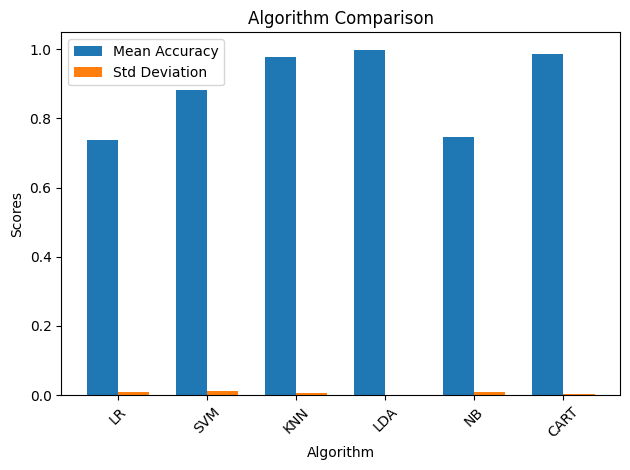

In [50]:
# Spot Check Algorithms
import pandas as pd
import matplotlib.pyplot as plt
models = [
('LR', LogisticRegression(solver='liblinear', multi_class='ovr')),
('SVM', LinearDiscriminantAnalysis()),
('KNN', KNeighborsClassifier()),
('LDA', DecisionTreeClassifier()),
('NB', GaussianNB()),
('CART', SVC(gamma='auto'))
]

results = []
names = []
seed = 7  # Define a seed for reproducibility
scoring = 'accuracy'  # Define scoring metric

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_res_shuf, Y_train_res_shuf, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# means = [cv_results.mean() for cv_results in results]
# stds = [cv_results.std() for cv_results in results]

# Plotting the results
import numpy as np
import matplotlib.pyplot as plt

# Assuming results, means, and stds are already defined
means = [cv_results.mean() for cv_results in results]
stds = [cv_results.std() for cv_results in results]

# Create a grouped bar chart
fig, ax = plt.subplots()

# Define bar width and positions
bar_width = 0.35
index = np.arange(len(names))

# Create bars for means and stds
bar1 = ax.bar(index, means, bar_width, label='Mean Accuracy')
bar2 = ax.bar(index + bar_width, stds, bar_width, label='Std Deviation')

# Add labels and title
ax.set_xlabel('Algorithm')
ax.set_ylabel('Scores')
ax.set_title('Algorithm Comparison')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(names, rotation=45)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()



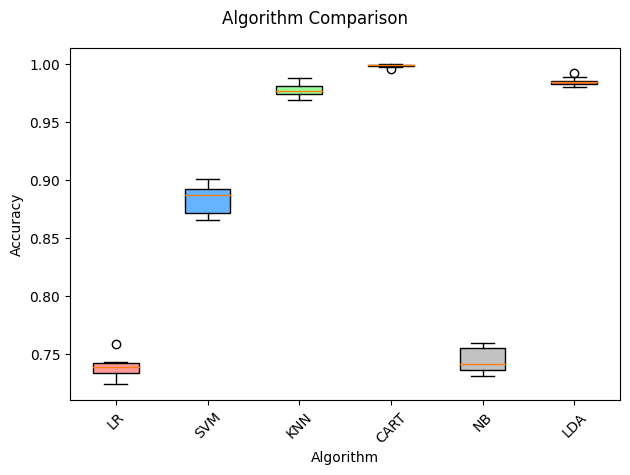

In [48]:
import matplotlib.pyplot as plt

# Plotting the results with a boxplot
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
boxplot = ax.boxplot(results, patch_artist=True)

# Adding colors to the boxplot
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2C2', '#FF6666']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Customizing plot
ax.set_xticklabels(names, rotation=45)
ax.set_xlabel('Algorithm')
ax.set_ylabel('Accuracy')

# Show the plot
plt.tight_layout()
plt.show()


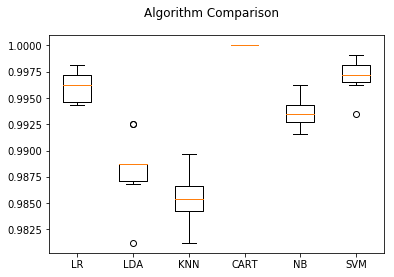

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('static/img/modelComparison/flood_models.png')
plt.show()

# Make predictions on validation dataset

In [ ]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train_res_shuf, Y_train_res_shuf)
predictions = knn.predict(X_test)
print(accuracy_score(Y_test, predictions))
cnf_matrix_tra = confusion_matrix(Y_test, predictions)
print(cnf_matrix_tra )
print(classification_report(Y_test, predictions))

0.9641770868536668
[[2812   96]
 [  10   41]]
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      2908
         1.0       0.30      0.80      0.44        51

    accuracy                           0.96      2959
   macro avg       0.65      0.89      0.71      2959
weighted avg       0.98      0.96      0.97      2959



In [ ]:
#-----------------------LinearDiscriminantAnalysis---------------------------------
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf1=LinearDiscriminantAnalysis()
clf1.fit(X_train_res_shuf, Y_train_res_shuf)
predictions = clf1.predict(X_test)
# y_predict3=clf1.predict(x_test)
print(accuracy_score(Y_test, predictions))
cnf_matrix_tra = confusion_matrix(Y_test, predictions)
print(cnf_matrix_tra )
print(classification_report(Y_test, predictions))

0.8137884420412301
[[2360  548]
 [   3   48]]
              precision    recall  f1-score   support

         0.0       1.00      0.81      0.90      2908
         1.0       0.08      0.94      0.15        51

    accuracy                           0.81      2959
   macro avg       0.54      0.88      0.52      2959
weighted avg       0.98      0.81      0.88      2959



In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 80.3921568627451%


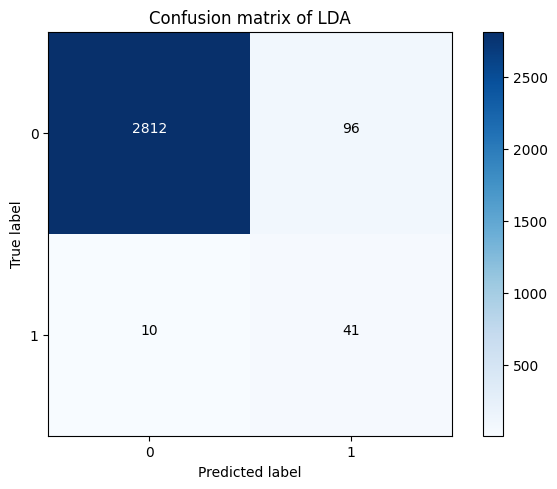

In [ ]:
#cnf_matrix_tra = confusion_matrix(Y_test, predictions)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix of LDA')
plt.savefig('static/img/modelComparison/flood_confusionmatrix.png')
plt.show()